In [1]:
import numpy as np
import pandas as pd
import tensorflow.keras as tf

In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(train_data,train_label),(test_data,test_labels) = imdb.load_data(num_words = 10000)

In [98]:
train_label

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
#Decoding of a Review

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i-3,"") for i in train_data[0]])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [8]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [107]:
from keras import models
from keras import layers

model = models.Sequential()
#model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(16, activation = "tanh"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [108]:
model.compile(optimizer = "rmsprop",loss = "binary_crossentropy",metrics = ["accuracy"])

In [109]:
history = model.fit(partial_x_train,partial_y_train,batch_size = 512, epochs = 3, validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 16s 1ms/step - loss: 0.4774 - accuracy: 0.8057 - val_loss: 0.3633 - val_accuracy: 0.8726
Epoch 2/3
15000/15000 [==============================] - 6s 373us/step - loss: 0.2836 - accuracy: 0.9102 - val_loss: 0.3050 - val_accuracy: 0.8836
Epoch 3/3
15000/15000 [==============================] - 5s 341us/step - loss: 0.2176 - accuracy: 0.9305 - val_loss: 0.2822 - val_accuracy: 0.8883


In [110]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 23s 938us/step


[0.3022971995639801, 0.8784000277519226]

In [111]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

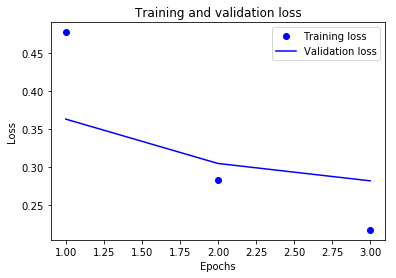

In [112]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


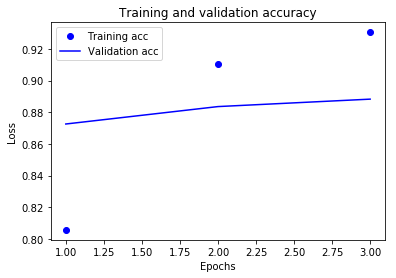

In [113]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [114]:
model.predict(x_test)

array([[0.29151738],
       [0.9938594 ],
       [0.84821147],
       ...,
       [0.1379328 ],
       [0.17128798],
       [0.43072546]], dtype=float32)